### 0. Import Libraries

In [290]:
# Import libraries

import pandas as pd
import numpy as np
import plotly.express as px
import time
from multiprocessing import Pool
import seaborn as sea
from datetime import datetime
from matplotlib import pyplot as plt

### 1. Data Collection

In [312]:
# Collect Data

data = pd.read_csv('Datasets/kc_house_data.csv')


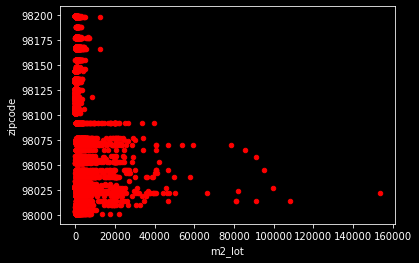

In [311]:
ax1 = data.plot.scatter(x='m2_lot',
                        y='zipcode',
                        c='red')

In [298]:
plt.scatter(data, x='price', y='m2_living')

TypeError: scatter() got multiple values for argument 'x'

In [285]:
import seaborn as sns
from matplotlib import pyplot as plt

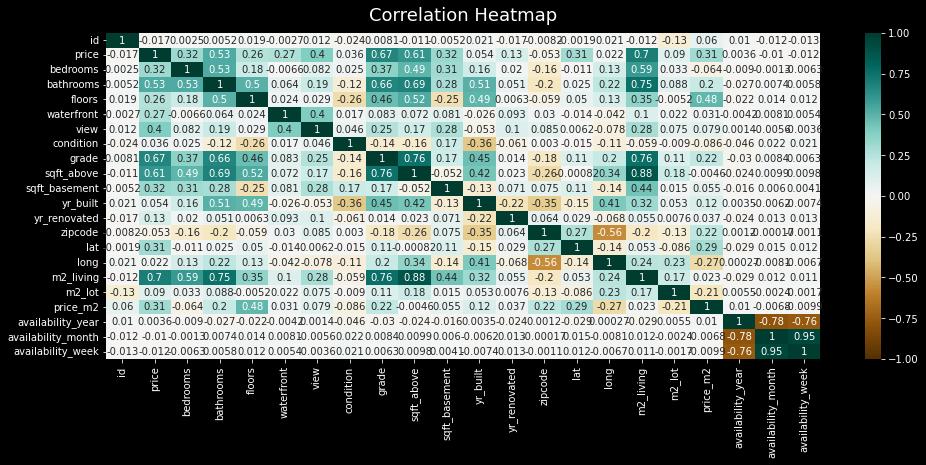

In [286]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
df_avg.head()

,Zipcode,Total Houses,Average Price,Mean of Bedrooms,Mean of Bathrooms,Average Living Area,Average Lot Area,Average Price/m2
42,98103,602,584919.210963,3.009967,1.934801,153.367112,323.529605,2371.922917
44,98106,335,319581.394030,3.101493,1.804478,138.228848,516.005448,993.474837


In [261]:
df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [262]:
df= filtered_data[attributes]

In [265]:
df.reset_index().drop('index', axis=1)

,price,bedrooms,bathrooms,m2_living,m2_lot,condition,grade,zipcode
0,835000.0,3,3.00,259.199370,1163.424269,4,8,98198
1,3000000.0,3,3.50,409.702230,999.264668,3,11,98056
2,635000.0,3,1.75,180.231820,15526.413875,4,7,98070
3,947500.0,3,2.75,276.850940,2521.759032,5,8,98166
4,2230000.0,3,3.50,349.315280,523.415502,3,11,98056
...,...,...,...,...,...,...,...,...
90,429592.0,2,2.75,185.062776,1016.916238,5,6,98070
91,800000.0,2,2.25,160.722190,2925.608373,4,7,98070
92,869000.0,2,1.75,176.515700,1219.073166,3,7,98178
93,1200000.0,2,2.25,200.670480,1659.340483,4,9,98146


In [254]:
df.head(50)

,0,price,bedrooms,bathrooms,m2_living,m2_lot,condition,grade,zipcode
0,0.0,640000.0,3.0,1.75,150.50286,557.418,5.0,7.0,98103.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# convert to metric system =====================
data = data.sort_values('bedrooms', ascending=False).reset_index()
data.loc[0, 'bedrooms'] = 3

data['m2_living'] = data['sqft_living'] * 0.092903
data['m2_lot'] = data['sqft_lot'] * 0.092903
data['price_m2'] = data['price']/(data['sqft_lot'] * 0.092903)

attributes = ['price', 'bedrooms', 'm2_living',
              'm2_lot', 'condition', 'grade', 'zipcode']


median_by_region = data[attributes].groupby('zipcode').median().reset_index()
median_by_region.columns = ['zipcode', 'median_price', 'median_bedrooms', 'median_m2_living',
                            'median_m2_lot', 'median_condition', 'median_grade']

data = pd.merge(data, median_by_region, on='zipcode', how='inner')

data = data.drop(['sqft_living', 'sqft_living15',
                 'sqft_lot', 'sqft_lot15', 'index'], axis=1)


# treatig outliers ==============================

data

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,long,m2_living,m2_lot,price_m2,median_price,median_bedrooms,median_m2_living,median_m2_lot,median_condition,median_grade
0,2402100895,20140625T000000,640000.0,3,1.75,1.0,0,0,5,7,...,-122.331,150.502860,557.418000,1148.150939,550000.0,3.0,139.819015,325.16050,3.0,7.0
1,1997200215,20140507T000000,599999.0,9,4.50,2.5,0,0,3,7,...,-122.338,355.818490,649.206164,924.204102,550000.0,3.0,139.819015,325.16050,3.0,7.0
2,263000324,20140513T000000,550000.0,7,4.00,2.0,0,0,3,7,...,-122.349,319.586320,752.514300,730.883121,550000.0,3.0,139.819015,325.16050,3.0,7.0
3,9550202010,20140710T000000,775000.0,6,2.75,1.5,0,0,3,7,...,-122.331,276.850940,464.515000,1668.406833,550000.0,3.0,139.819015,325.16050,3.0,7.0
4,993000100,20150410T000000,760000.0,6,3.75,2.0,0,0,4,8,...,-122.340,353.960430,571.353450,1330.174868,550000.0,3.0,139.819015,325.16050,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,222029026,20140917T000000,340000.0,2,0.75,1.0,1,2,5,6,...,-122.511,98.477180,4486.471676,75.783383,463750.0,3.0,174.193125,4099.80939,4.0,7.0
21609,2781600195,20141117T000000,285000.0,1,1.00,1.0,1,4,3,5,...,-122.445,98.477180,5095.357938,55.933264,463750.0,3.0,174.193125,4099.80939,4.0,7.0
21610,2123039032,20141027T000000,369900.0,1,0.75,1.0,1,4,5,5,...,-122.438,70.606280,936.369337,395.036430,463750.0,3.0,174.193125,4099.80939,4.0,7.0
21611,3023039231,20140714T000000,650000.0,1,1.00,1.5,0,0,3,6,...,-122.472,85.470760,8498.394828,76.485032,463750.0,3.0,174.193125,4099.80939,4.0,7.0


In [5]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop('id', axis=1)
mean_ = pd.DataFrame(num_attributes.apply(np.mean))
median_ = pd.DataFrame(num_attributes.apply(np.median))
std_ = pd.DataFrame(num_attributes.apply(np.std))

max_ = pd.DataFrame(num_attributes.apply(np.max))
min_ = pd.DataFrame(num_attributes.apply(np.min))

descriptive_stats = pd.concat(
    [max_, min_, mean_, median_, std_], axis=1).reset_index()


In [6]:
descriptive_stats.columns = ['Attributes', 'Max',
                             'Min', 'Mean', 'Median', 'Std. Deviation']

In [7]:
descriptive_stats

,Attributes,Max,Min,Mean,Median,Std. Deviation
0,price,7.700000e+06,75000.000000,540088.141767,450000.000000,367118.703181
1,bedrooms,1.100000e+01,0.000000,3.369454,3.000000,0.907943
2,bathrooms,8.000000e+00,0.000000,2.114757,2.250000,0.770145
3,floors,3.500000e+00,1.000000,1.494309,1.500000,0.539976
4,waterfront,1.000000e+00,0.000000,0.007542,0.000000,0.086515
5,view,4.000000e+00,0.000000,0.234303,0.000000,0.766300
6,condition,5.000000e+00,1.000000,3.409430,3.000000,0.650728
7,grade,1.300000e+01,1.000000,7.656873,7.000000,1.175432
8,sqft_above,9.410000e+03,290.000000,1788.390691,1560.000000,828.071820
9,sqft_basement,4.820000e+03,0.000000,291.509045,0.000000,442.564804


In [8]:
descriptive_stats = descriptive_stats.iloc[:18]
descriptive_stats.reset_index()


,index,Attributes,Max,Min,Mean,Median,Std. Deviation
0,0,price,7.700000e+06,75000.000000,540088.141767,450000.000000,367118.703181
1,1,bedrooms,1.100000e+01,0.000000,3.369454,3.000000,0.907943
2,2,bathrooms,8.000000e+00,0.000000,2.114757,2.250000,0.770145
3,3,floors,3.500000e+00,1.000000,1.494309,1.500000,0.539976
4,4,waterfront,1.000000e+00,0.000000,0.007542,0.000000,0.086515
5,5,view,4.000000e+00,0.000000,0.234303,0.000000,0.766300
6,6,condition,5.000000e+00,1.000000,3.409430,3.000000,0.650728
7,7,grade,1.300000e+01,1.000000,7.656873,7.000000,1.175432
8,8,sqft_above,9.410000e+03,290.000000,1788.390691,1560.000000,828.071820
9,9,sqft_basement,4.820000e+03,0.000000,291.509045,0.000000,442.564804


In [11]:
descriptive_stats

,Attributes,Max,Min,Mean,Median,Std. Deviation
0,price,7.700000e+06,75000.000000,540088.141767,450000.000000,367118.703181
1,bedrooms,1.100000e+01,0.000000,3.369454,3.000000,0.907943
2,bathrooms,8.000000e+00,0.000000,2.114757,2.250000,0.770145
3,floors,3.500000e+00,1.000000,1.494309,1.500000,0.539976
4,waterfront,1.000000e+00,0.000000,0.007542,0.000000,0.086515
5,view,4.000000e+00,0.000000,0.234303,0.000000,0.766300
6,condition,5.000000e+00,1.000000,3.409430,3.000000,0.650728
7,grade,1.300000e+01,1.000000,7.656873,7.000000,1.175432
8,sqft_above,9.410000e+03,290.000000,1788.390691,1560.000000,828.071820
9,sqft_basement,4.820000e+03,0.000000,291.509045,0.000000,442.564804


In [12]:
descriptive_stats.drop([13,14], inplace=True)

C:\Users\renato.domingues\AppData\Local\Temp\ipykernel_8108\1386237397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats.drop([13,14], inplace=True)


In [18]:
descriptive_stats.reset_index(inplace=True)

In [21]:
descriptive_stats = descriptive_stats.drop(['index'], axis=1)

In [22]:
descriptive_stats

,Attributes,Max,Min,Mean,Median,Std. Deviation
0,price,7.700000e+06,75000.000000,540088.141767,450000.000000,367118.703181
1,bedrooms,1.100000e+01,0.000000,3.369454,3.000000,0.907943
2,bathrooms,8.000000e+00,0.000000,2.114757,2.250000,0.770145
3,floors,3.500000e+00,1.000000,1.494309,1.500000,0.539976
4,waterfront,1.000000e+00,0.000000,0.007542,0.000000,0.086515
5,view,4.000000e+00,0.000000,0.234303,0.000000,0.766300
6,condition,5.000000e+00,1.000000,3.409430,3.000000,0.650728
7,grade,1.300000e+01,1.000000,7.656873,7.000000,1.175432
8,sqft_above,9.410000e+03,290.000000,1788.390691,1560.000000,828.071820
9,sqft_basement,4.820000e+03,0.000000,291.509045,0.000000,442.564804


In [ ]:
f_attributes = ['id', 'price', 'bedrooms', 'bathrooms', 'm2_living', 'm2_lot', 'zipcode']

In [ ]:
df = data[f_attributes]

In [ ]:
df

In [ ]:
df = df[float_columns in df[f_attributes]]

In [ ]:
df = df.style.format(subset=float_columns in df.columns, formatter="{:.2f}")

In [ ]:
df

### 2. Initial EDA

In [ ]:
#data overview
data.head()

In [ ]:
#list data columns
data.columns

In [ ]:
#list data types
data.dtypes

In [ ]:
# Supress scientific notation 
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
# Verifying duplicated IDs
data = data['id'].unique()
unique_ids = len(data)
len(data) - unique_ids

In [ ]:
# Create dataset with unique IDs, keeping the most recent acordingly to 'date'

data_recent_only = data.sort_values('date', ascending=True).drop_duplicates(subset='id', keep='last')
data_recent_only.shape

In [ ]:
# Descriptive Analysis
data.describe()

### 3. Data Cleaning

In [ ]:
#Correcting date formats

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d' )
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y' )
data['yr_built'] = data['yr_built'].dt.year


In [ ]:
# 33 Bedroom house outlier analysis

data = data[['id', 'bedrooms', 'price', 'sqft_living', 'sqft_above','zipcode', 'waterfront']].sort_values('bedrooms', ascending=False)
data

In [ ]:
data[(df['zipcode'] == 98103) & (df['bedrooms'] == 3)]

In [ ]:
# Houses in the same region, with no waterfront, bigger living area, fewer bedrooms are costing more than the refered house.
# By analysing houses within the same caracteristics and 3 bedroom, seems reasonable that 33 was a typo that should be only 3.

In [ ]:
data = data.sort_values('bedrooms', ascending=False).reset_index()

In [ ]:
data.loc[0, 'bedrooms'] = 3

### 4. Data Transformation

In [ ]:
# Create Condition status based on condition level
    # if 'condition' <=2, ‘bad’
    # if 'condition' = 3 or 4, ‘regular’
    # if 'condition' =>5, ‘good’

data['condition_type'] = data['condition'].apply( lambda x: 'bad' if x <= 2 else 'regular' if x <= 4 else 'good')

In [ ]:
# Drop unescessary columns

data = data.drop(['sqft_living15' , 'sqft_lot15'], axis=1)

In [ ]:
# Defining Price Range and Price Range lvl

data['price_range'] = data['price'].apply( lambda x: 'up to $321950' if x < 321950 else
                                                     '$321950 to $450000' if x < 450000 else
                                                     '$450000 to $645000' if x < 645000 else
                                                     'from $645000')

data['price_cat'] = data['price'].apply( lambda x: 0 if x < 321950 else
                                                     1 if x < 450000 else
                                                     2 if x < 645000 else
                                                     3)

In [ ]:
data

#### 4.1 Getting Geographical Info

In [ ]:
#Create lat + long column
data['latlong'] = data[['lat', 'long']].apply( lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)


In [ ]:
#Create new attribute empty columns

data['neighbourhood'] = 'NA'
data['city'] = 'NA'
data['state'] = 'NA'

In [ ]:
# %%writefile defs_newatt.py
# # THIS FUNCION WILL BE SAVED AS A .PY FILE NAMED 'defs'

# import time
# import geopy.geocoders
# from geopy.geocoders import Nominatim
# import certifi
# import ssl

# ctx = ssl.create_default_context()
# ctx.check_hostname = False
# ctx.verify_mode = ssl.CERT_NONE
# geopy.geocoders.options.default_ssl_context = ctx

# geolocator = Nominatim( user_agent='geopyExercises')

# def get_data(x):
#     index, row = x
#     time.sleep(10)
   
#     #API request
#     response = geolocator.reverse( row['latlong'] )
#     address = response.raw['address']

#     neighbourhood = address['neighbourhood'] if 'neighbourhood' in address else 'NA'
#     city = address['city'] if 'city' in address else 'NA'
#     state = address['state'] if 'state' in address else 'NA'

#     return neighbourhood, city, state

In [ ]:
# import defs_newatt

In [ ]:
# df = data[['id', 'latlong']].head(100)
# p = Pool(4)

# start = time.process_time()
# df[['neighbourhood', 'city', 'state']] = p.map( defs_newatt.get_data, df.iterrows())
# end = time.process_time()

# print('Time Elapsed: {}', end - start)

### 5. Descriptive Statistics and Metrics

In [ ]:
attributes = ['price','bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'zipcode']

mean_by_region = data[attributes].groupby( 'zipcode' ).mean().reset_index()
median_by_region = data[attributes].groupby( 'zipcode' ).median().reset_index()
max_by_region = data[attributes].groupby( 'zipcode' ).max().reset_index()
min_by_region = data[attributes].groupby( 'zipcode' ).min().reset_index()
std_by_region = data[attributes].groupby( 'zipcode' ).std().reset_index()


In [ ]:
median_by_region.columns

In [ ]:
median_by_region.columns = ['zipcode', 'median_price', 'median_bedrooms', 'median_sqft_living', 'median_sqft_lot', 'median_condition', 'median_grade']

In [ ]:
median_by_region

In [ ]:
oldest_listed = data['date'].min()
newest_listed = data['date'].max()
max_price = data['price'].max()
min_price = data['price'].min()
num_bedrooms = sorted(data['bedrooms'].unique())
median_pric =data['price'].median()


### 4.2 Opportunities Dataset

In [ ]:
data = pd.merge( data, median_by_region, on='zipcode', how='inner')

### 6. Data Visualization

In [ ]:
mapa = px.scatter_mapbox( data,
                          lat='lat',
                          lon='long',
                          color='price_cat',
                          size='price',
                          hover_name='id',
                          hover_data=['price'],
                          color_discrete_sequence=['darkgreen'],
                          #color_continuous_scale=px.colors.cyclical.IceFire,
                          zoom=9,
                          height=300)

mapa.update_layout( mapbox_style='open-street-map')
mapa.update_layout( height=600, margin={'r':0, 't':0,'l':0,'b':0 })
mapa.show()

In [ ]:
opp = data[(data['price'] < data['median_price']) &
         (data['condition'] > data['median_condition']) &
         (data['sqft_lot'] > data['median_sqft_lot']) &
         (data['sqft_living'] > data['median_sqft_living']) ]

In [ ]:
mapa = px.scatter_mapbox( opp,
                          lat='lat',
                          lon='long',
                          color='price_cat',
                          size='price',
                          hover_name='id',
                          hover_data=['price'],
                          color_discrete_sequence=['darkgreen'],
                          #color_continuous_scale=px.colors.cyclical.IceFire,
                          zoom=9,
                          height=300)

mapa.update_layout( mapbox_style='open-street-map')
mapa.update_layout( height=600, margin={'r':0, 't':0,'l':0,'b':0 })
mapa.show()

In [ ]:
dataframe = data[['bedrooms','id']].groupby('bedrooms').count().reset_index()
dataframe

In [ ]:
rows = dataframe.shape[0]
rows

In [ ]:
teste = dataframe[dataframe['bedrooms'] <= 5]
teste

In [ ]:
fig = px.bar( dataframe.head(11), x='bedrooms', y='id', text_auto=True, color='bedrooms', color_continuous_scale=px.colors.sequential.YlOrRd )
fig.update_layout(bargap=0.2)
fig

In [ ]:
sea.countplot(data=data, x='bedrooms')